The purpose of this notebook is data profiling, that is required to perform some exploratory analysis
Steps include:
1. Analyze the average length(the number of words in the reviews) of reviews
    the main reason is that the length of texts can influence the performance of models. 
2. Word frequency analysis
    To see keywords in the reviews
3. Analyze the average number of sentences in the reviews
    To see how complicated the reviews are
Note. Because the entire dataset of reviews is huge, this place only use a part of dataset to do exploratory analysis

In [5]:
import nltk
import gensim
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('data/Review4.csv')
doc_sets = [str(r[4]) for _, r in df.iterrows()]

corpus = []
for i,r in df.iterrows():
    corpus.append(gensim.utils.simple_preprocess(str(r[4])))

The following snippet is to count the number of words in the reviews

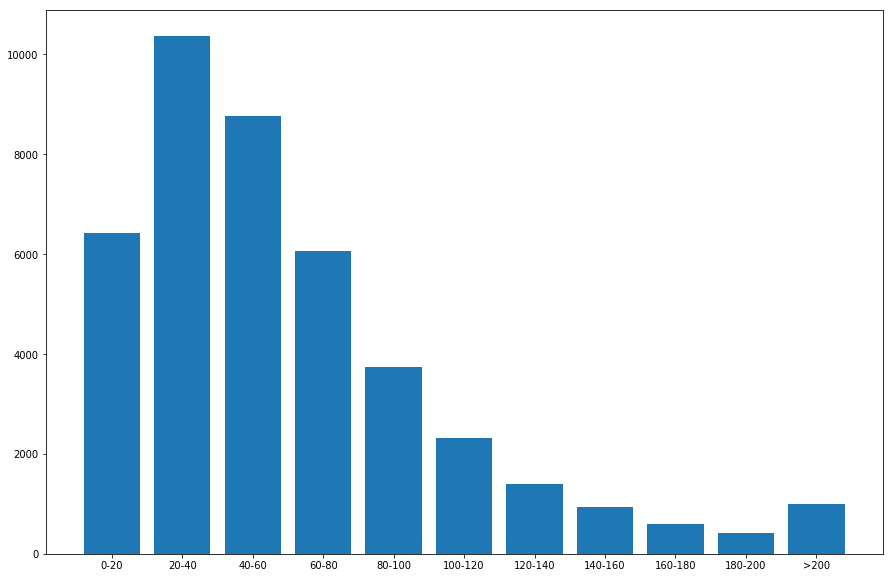

<Figure size 432x288 with 0 Axes>

In [6]:
number_words = [len(x) for x in corpus]
results = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for n in number_words:
    if n < 20:
        results[0] += 1
    elif n >= 20 and n < 40:
        results[1] += 1
    elif n >= 40 and n < 60:
        results[2] += 1
    elif n >= 60 and n < 80:
        results[3] += 1
    elif n >= 80 and n < 100:
        results[4] += 1
    elif n >= 100 and n < 120:
        results[5] += 1
    elif n >= 120 and n < 140:
        results[6] += 1
    elif n >= 140 and n < 160:
        results[7] += 1
    elif n >= 160 and n < 180:
        results[8] += 1
    elif n >= 180 and n < 200:
        results[9] += 1
    elif n >= 200:
        results[10] += 1

x = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '>200']
plt.figure(figsize=(15,10))
plt.bar(x, results)
plt.show()
#plt.savefig("examples.jpg")

The following snippet is for word frequency analysis

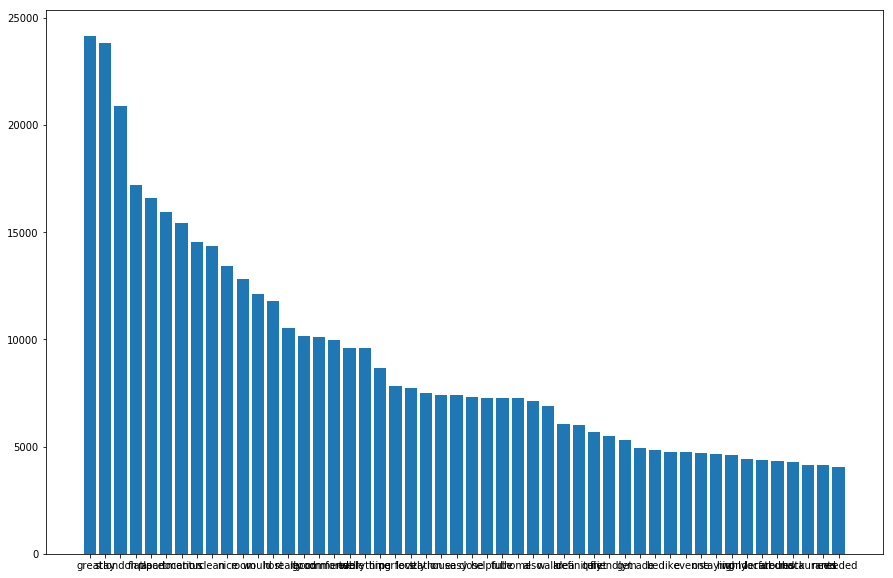

In [7]:
words = []
for i in corpus:
    for w in i:
        words.append(w)
        
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
cleaned_words = [w for w in words if w not in stop_words]

_dist = nltk.FreqDist(cleaned_words)
x = [d[0] for d in _dist.most_common(50)]
y = [d[1] for d in _dist.most_common(50)]
plt.figure(figsize=(15,10))
plt.bar(x, y)
plt.show()

The following snippet is to count the number of sentences in the reviews

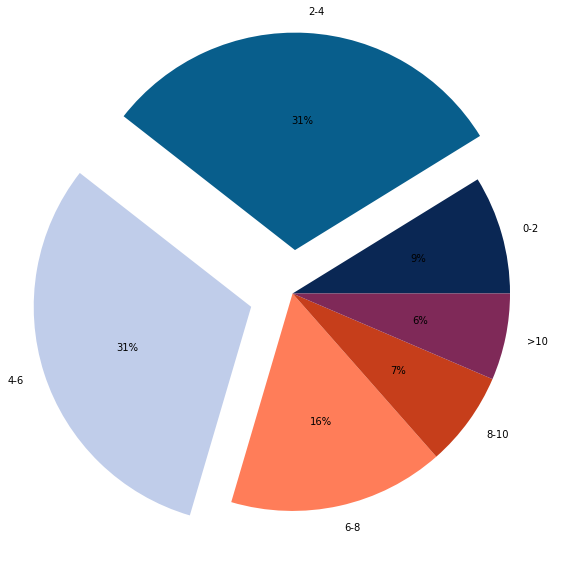

In [8]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
number_sentences = [len(tokenizer.tokenize(x)) for x in doc_sets]

results = [0, 0, 0, 0, 0, 0]

for n in number_sentences:
    if n < 2:
        results[0] += 1
    elif n >= 2 and n < 4:
        results[1] += 1
    elif n >= 4 and n < 6:
        results[2] += 1
    elif n >= 6 and n < 8:
        results[3] += 1
    elif n >= 8 and n < 10:
        results[4] += 1
    elif n >= 10:
        results[5] += 1

x = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']
colors = ['#0A2754','#085E8C','#C0CDEA','#FF7D59','#C63E1B','#7F2958']
explode = (0, 0.2, 0.2, 0, 0, 0)
plt.figure(figsize=(15,10))
plt.pie(results, labels=x, explode=explode, colors=colors, autopct='%.0f%%')
plt.show()